In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='dark')

In [2]:
dataset_train = pd.read_csv('trainset.csv')

In [3]:
dataset_test = pd.read_csv('testset.csv')

In [4]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [5]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [6]:
trainset = dataset_train.iloc[:,1:2].values

In [7]:
testset = dataset_test.iloc[:,1:2].values

In [8]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [9]:
testset

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [11]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [12]:
x_train = []
y_train = []

In [13]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i,0])
    y_train.append(training_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train.shape

(1199, 60)

In [15]:
y_train.shape

(1199,)

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =(x_train.shape[1],1)))

In [20]:
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(Dense(units=1))

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
regressor.fit(x_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0291
Epoch 2/100
1199/1199 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 3/100
1199/1199 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 4/100
1199/1199 [==============================] - 3s 3ms/step - loss: 0.0035
Epoch 5/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 6/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 7/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0031
Epoch 8/100
1199/1199 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 9/100
1199/1199 [==============================] - 3s 3ms/step - loss: 0.0035
Epoch 10/100
1199/1199 [==============================] - 3s 3ms/step - loss: 0.0029
Epoch 11/100
1199/1199 [==============================] - 3s 3ms/step - loss: 0.0030
Epoch 12/100
1199/1199 [==============================] - 4s 3ms/step - lo

In [27]:
testset = dataset_test.iloc[:,1:2].values

In [28]:
testset

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(testset)

In [30]:
training_scaled

array([[0.29866245],
       [0.3854942 ],
       [0.51429989],
       [0.54692277],
       [0.59167038],
       [0.63065497],
       [0.5637778 ],
       [0.61379995],
       [0.59264936],
       [0.75630736],
       [0.72210749],
       [0.75032663],
       [0.75260981],
       [0.78338424],
       [0.90495878],
       [1.        ],
       [0.97390209],
       [0.98776642],
       [0.99537856],
       [0.9483471 ],
       [0.96324483],
       [0.91996535],
       [0.69916289],
       [0.52843634],
       [0.1836129 ],
       [0.47917613],
       [0.33710345],
       [0.12962173],
       [0.29681401],
       [0.28050257],
       [0.30197903],
       [0.46574587],
       [0.51652931],
       [0.52827306],
       [0.61472384],
       [0.66757275],
       [0.64827128],
       [0.73069861],
       [0.80377355],
       [0.70476331],
       [0.62233598],
       [0.32443447],
       [0.44437826],
       [0.57530452],
       [0.52076977],
       [0.66284245],
       [0.77528295],
       [0.926

In [31]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [32]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [33]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [34]:
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [35]:
inputs = inputs.reshape(-1,1)

In [36]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [37]:
inputs = sc.transform(inputs)

In [38]:
inputs

array([[-0.20617653],
       [-0.14522599],
       [-0.072912  ],
       [-0.072912  ],
       [-0.10705744],
       [-0.03240518],
       [-0.00766623],
       [-0.00712265],
       [-0.01696387],
       [-0.00891667],
       [-0.04028911],
       [-0.02158532],
       [-0.02115025],
       [-0.12728347],
       [-0.13614604],
       [-0.072912  ],
       [ 0.08579834],
       [ 0.11195101],
       [ 0.11858417],
       [ 0.12940437],
       [ 0.15414332],
       [ 0.15604619],
       [ 0.19345379],
       [ 0.18410206],
       [ 0.20177278],
       [ 0.22063952],
       [ 0.17969765],
       [ 0.16316884],
       [ 0.15865625],
       [ 0.14027866],
       [ 0.15827561],
       [ 0.22074837],
       [ 0.1459876 ],
       [ 0.16257083],
       [ 0.22613109],
       [ 0.23086138],
       [ 0.25331683],
       [ 0.33536319],
       [ 0.26788868],
       [ 0.1574599 ],
       [ 0.1217378 ],
       [ 0.10466508],
       [ 0.01375614],
       [ 0.04398667],
       [ 0.14691182],
       [ 0

In [39]:
inputs.shape

(185, 1)

In [41]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [42]:
x_test = np.array(x_test)

In [43]:
x_test.shape

(125, 60)

In [44]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [45]:
predicted_price = regressor.predict(x_test)

In [47]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1052.5771],
       [1050.78  ],
       [1052.8007],
       [1061.8964],
       [1075.2762],
       [1088.1954],
       [1097.7401],
       [1100.4768],
       [1099.665 ],
       [1097.8168],
       [1102.1302],
       [1110.2238],
       [1118.2375],
       [1123.3933],
       [1126.406 ],
       [1132.3486],
       [1143.4849],
       [1153.9207],
       [1160.1865],
       [1162.6672],
       [1161.7489],
       [1160.4652],
       [1159.1464],
       [1151.4369],
       [1135.7643],
       [1110.2988],
       [1088.9192],
       [1076.6719],
       [1067.6919],
       [1063.2358],
       [1062.7949],
       [1064.7966],
       [1071.7075],
       [1082.3983],
       [1092.2312],
       [1100.2648],
       [1106.926 ],
       [1110.7538],
       [1114.3662],
       [1120.4977],
       [1124.0157],
       [1121.1665],
       [1106.4036],
       [1089.2262],
       [1081.5897],
       [1084.1606],
       [1095.7781],
       [1112.7665],
       [1132.2156],
       [1148.0737],


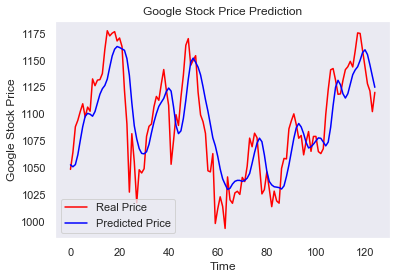

In [48]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()